In [19]:
#librerias
import pandas as pd
import io
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import cv2 #pip install opencv-python

In [1]:
#codigo del readme
from datasets import load_dataset

# Load the Falah/Alzheimer_MRI dataset
dataset = load_dataset('Falah/Alzheimer_MRI', split='train')

# Print the number of examples and the first few samples
print("Number of examples:", len(dataset))
print("Sample data:")
for example in dataset[:5]:
    print(example)

C:\Users\fabia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of examples: 5120
Sample data:
image
label


In [ ]:
#descargar las imagenes
# Crear una carpeta para guardar las imágenes
output_dir = 'alzheimer_mri_images'
os.makedirs(output_dir, exist_ok=True)

# Guardar las imágenes y sus etiquetas
for i, example in enumerate(dataset):
    image = example['image']
    label = example['label']
    
    # Guardar la imagen
    image_path = os.path.join(output_dir, f'image_{i}_{label}.png')
    image.save(image_path)
    
    if i % 100 == 0:
        print(f'Guardadas {i} imágenes...')

print("¡Descarga completada!")

Guardadas 0 imágenes...
Guardadas 100 imágenes...
Guardadas 200 imágenes...
Guardadas 300 imágenes...
Guardadas 400 imágenes...
Guardadas 500 imágenes...
Guardadas 600 imágenes...
Guardadas 700 imágenes...
Guardadas 800 imágenes...
Guardadas 900 imágenes...
Guardadas 1000 imágenes...
Guardadas 1100 imágenes...
Guardadas 1200 imágenes...
Guardadas 1300 imágenes...
Guardadas 1400 imágenes...
Guardadas 1500 imágenes...
Guardadas 1600 imágenes...
Guardadas 1700 imágenes...
Guardadas 1800 imágenes...
Guardadas 1900 imágenes...
Guardadas 2000 imágenes...
Guardadas 2100 imágenes...
Guardadas 2200 imágenes...
Guardadas 2300 imágenes...
Guardadas 2400 imágenes...
Guardadas 2500 imágenes...
Guardadas 2600 imágenes...
Guardadas 2700 imágenes...
Guardadas 2800 imágenes...
Guardadas 2900 imágenes...
Guardadas 3000 imágenes...
Guardadas 3100 imágenes...
Guardadas 3200 imágenes...
Guardadas 3300 imágenes...
Guardadas 3400 imágenes...
Guardadas 3500 imágenes...
Guardadas 3600 imágenes...
Guardadas 370

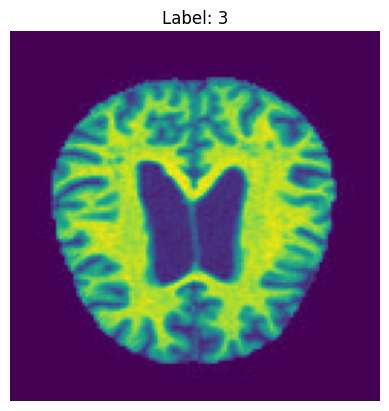

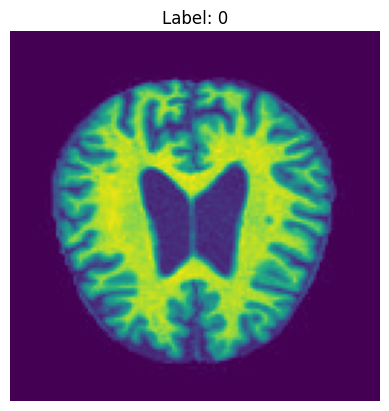

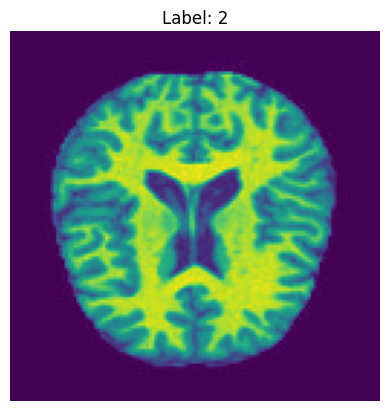

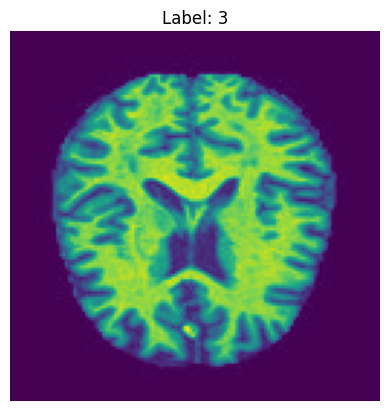

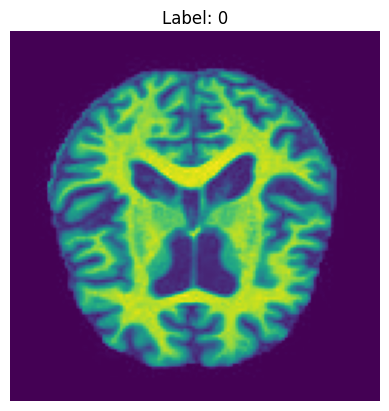

In [ ]:
#visualizar imagenes
# Leer el archivo Parquet (asegúrate de usar la ruta correcta)
df = pd.read_parquet(r'C:\Users\fabia\OneDrive\Escritorio\JIC\archive\Alzheimer MRI Disease Classification Dataset\Data\test-00000-of-00001-44110b9df98c5585.parquet')

# Función para mostrar imágenes
def show_image_from_bytes(row):
    # Extraer los bytes de la imagen (el diccionario tiene una clave 'bytes')
    image_bytes = row['image']['bytes']
    
    # Convertir bytes a imagen PIL
    image = Image.open(io.BytesIO(image_bytes))
    
    # Mostrar la imagen
    plt.imshow(image)
    plt.title(f'Label: {row["label"]}')  # Mostrar la etiqueta
    plt.axis('off')
    plt.show()

# Mostrar las primeras 5 imágenes
for _, row in df.head().iterrows():
    show_image_from_bytes(row)

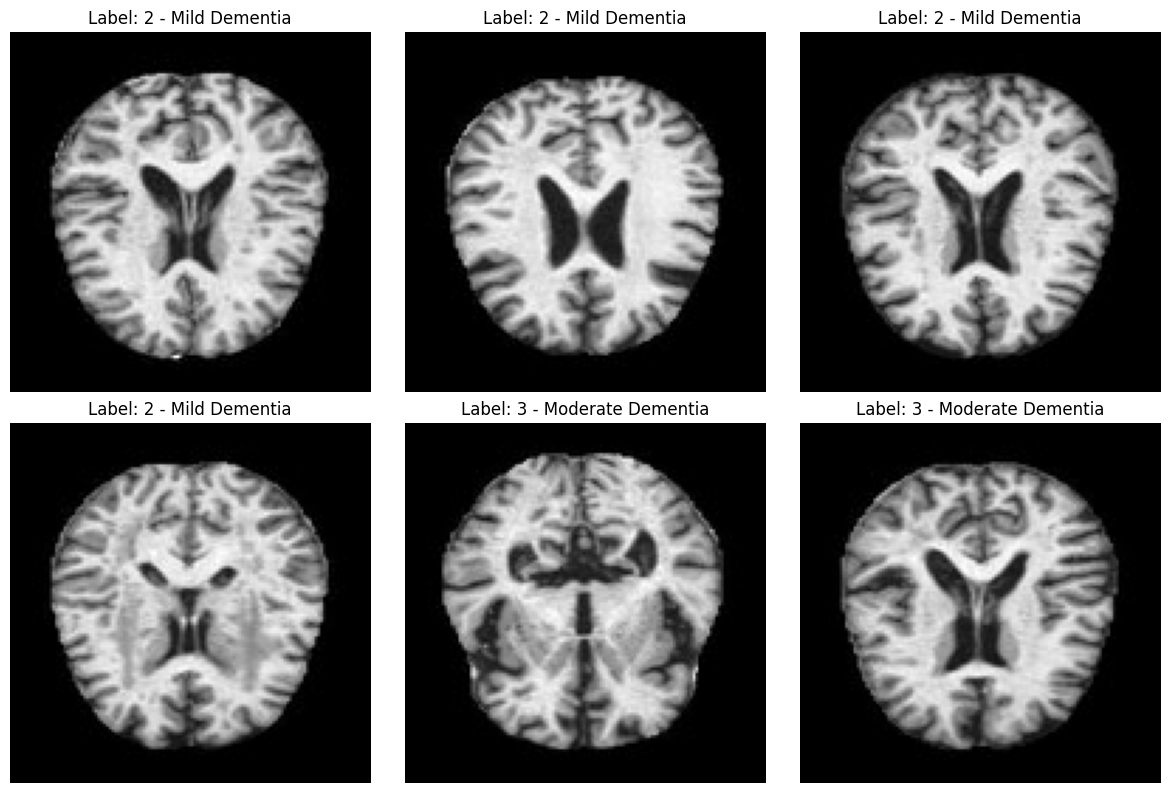

In [16]:
#visualizar imagenes con categoria

# Diccionario de etiquetas (ajusta según tu dataset)
label_map = {
    0: "No Dementia",
    1: "Very Mild Dementia",
    2: "Mild Dementia",
    3: "Moderate Dementia"
}

# Ruta del directorio con las imágenes
image_dir = r'C:\Users\fabia\OneDrive\Escritorio\JIC\archive\Alzheimer MRI Disease Classification Dataset\Data\alzheimer_mri_images'

# Listar archivos y extraer etiquetas
image_files = [f for f in os.listdir(image_dir) if f.startswith('image_')]
images_with_labels = []

for file in image_files:
    # Extraer número y etiqueta del nombre (ej: "image_0_2" → label=2)
    parts = file.split('_')
    if len(parts) >= 3:  # Asegurar que el formato sea correcto
        idx = int(parts[1])  # Número de orden (opcional)
        label = int(parts[2].split('.')[0])  # Etiqueta (removiendo extensión .jpg, .png, etc.)
        images_with_labels.append((file, label))

# Mostrar imágenes con etiquetas
plt.figure(figsize=(12, 8))
for i, (file, label) in enumerate(images_with_labels[:6]):  # Primeras 6 imágenes
    image_path = os.path.join(image_dir, file)
    image = Image.open(image_path)
    
    plt.subplot(2, 3, i+1)
    plt.imshow(image, cmap='gray' if image.mode == 'L' else None)
    plt.title(f"Label: {label} - {label_map.get(label, 'Unknown')}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#filtro gaussian_blur


In [21]:
#aplicación de filtro gaussian blur
input_dir = r'C:\Users\fabia\OneDrive\Escritorio\JIC\archive\Alzheimer MRI Disease Classification Dataset\Data\alzheimer_mri_images'  
output_dir = 'imagenes_filtrada_gaussian_blur'  # Carpeta de salida
os.makedirs(output_dir, exist_ok=True)  # Crear carpeta si no existe

# --- 1. Listar archivos ---
image_files = [f for f in os.listdir(input_dir) if f.startswith('image_')]
print(f"Se encontraron {len(image_files)} imágenes.")

# --- 2. Procesar cada imagen ---
for file in image_files:
    # Cargar imagen
    image_path = os.path.join(input_dir, file)
    image = Image.open(image_path)
    image_np = np.array(image)  # Convertir a NumPy
    
    # Aplicar Gaussian Blur
    blurred_np = cv2.GaussianBlur(image_np, (5, 5), 0)  
    
    # Guardar imagen filtrada
    output_path = os.path.join(output_dir, f"blurred_{file}")
    Image.fromarray(blurred_np).save(output_path)

print("¡Procesamiento completado!")



Se encontraron 5120 imágenes.
¡Procesamiento completado!
